# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

# Load Data

In [5]:
df = pd.read_csv('/content/spam.csv', encoding='latin1')

# Data Exploration

In [6]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [7]:
df.sample()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
19,spam,England v Macedonia - dont miss the goals/team...,NaN,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
df.isnull().sum()

,0
v1,0
v2,0
Unnamed: 2,5522
Unnamed: 3,5560
Unnamed: 4,5566


In [10]:
df.duplicated().sum()

np.int64(403)

In [13]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [14]:
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

In [16]:
df.rename(columns={'v1': 'type', 'v2': 'text'}, inplace=True)
print(df.head())

   type                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [17]:
df.shape

(5572, 2)

In [18]:
df.drop_duplicates(inplace=True)

In [19]:
df.duplicated().sum()

np.int64(0)

In [20]:
df.type.value_counts()

,count
type,
ham,4516
spam,653


# data analysis

In [22]:
print(df["type"].value_counts())

print(df["type"].value_counts(normalize=True) * 100)



type
ham     4516
spam     653
Name: count, dtype: int64
type
ham     87.366996
spam    12.633004
Name: proportion, dtype: float64


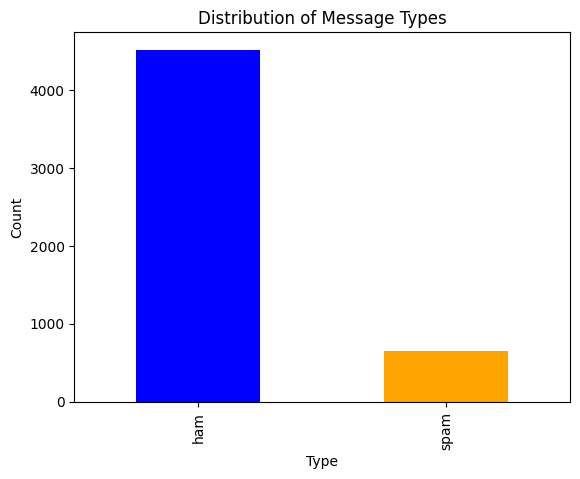

In [23]:
df["type"].value_counts().plot(kind="bar", color=["blue", "orange"])
plt.title("Distribution of Message Types")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()


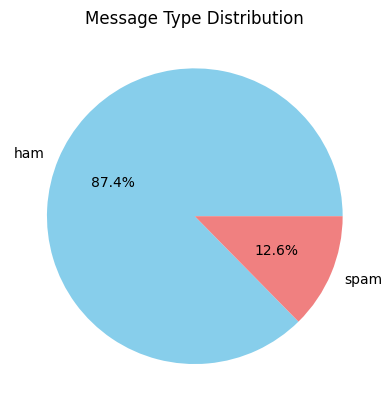

In [24]:
df["type"].value_counts().plot(kind="pie", autopct="%1.1f%%", colors=["skyblue", "lightcoral"])
plt.title("Message Type Distribution")
plt.ylabel("")
plt.show()


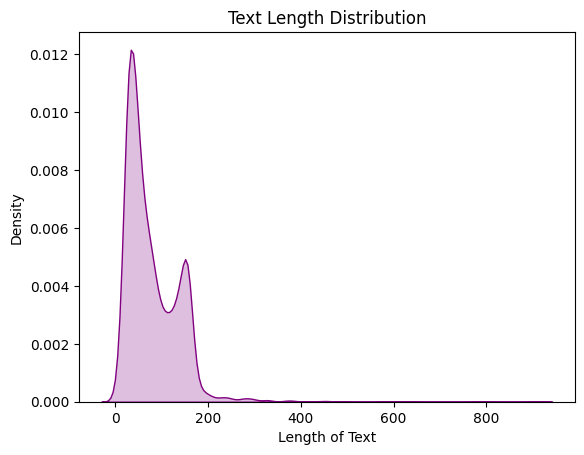

In [25]:
df["text_length"] = df["text"].apply(len)

sns.kdeplot(df["text_length"], fill=True, color="purple")
plt.title("Text Length Distribution")
plt.xlabel("Length of Text")
plt.ylabel("Density")
plt.show()


<ipython-input-26-e53103452bb1>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["type"], y=df["text_length"], palette="coolwarm")


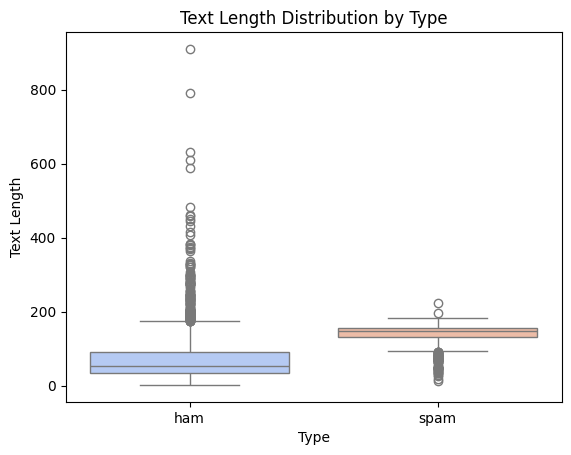

In [26]:
sns.boxplot(x=df["type"], y=df["text_length"], palette="coolwarm")
plt.title("Text Length Distribution by Type")
plt.xlabel("Type")
plt.ylabel("Text Length")
plt.show()


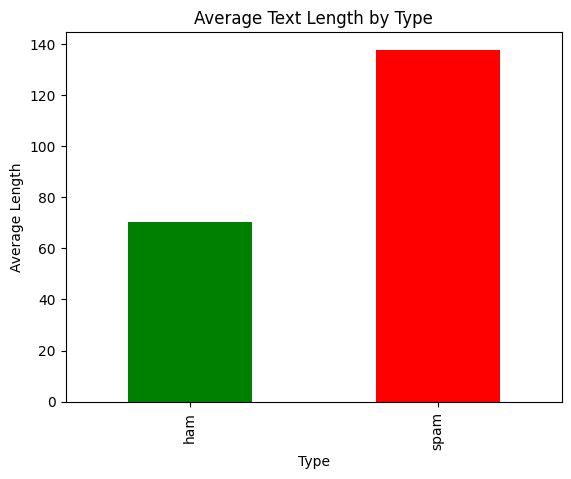

In [27]:
df.groupby("type")["text_length"].mean().plot(kind="bar", color=["green", "red"])
plt.title("Average Text Length by Type")
plt.xlabel("Type")
plt.ylabel("Average Length")
plt.show()


# Preparing data for the model

In [28]:
df.isnull().sum()

,0
type,0
text,0
text_length,0


In [30]:
df.duplicated().sum()

np.int64(0)

In [31]:
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [32]:
def preprocess_text(dataframe):
    column_name = 'text'
    dataframe[column_name] = dataframe[column_name].fillna('')
    dataframe[column_name] = dataframe[column_name].str.lower()
    dataframe[column_name] = dataframe[column_name].str.translate(str.maketrans('', '', string.punctuation))
    dataframe[column_name] = dataframe[column_name].apply(lambda x: re.sub(r'\d+', '', x))
    stop_words = set(stopwords.words('english'))
    dataframe[column_name] = dataframe[column_name].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
    lemmatizer = WordNetLemmatizer()
    dataframe[column_name] = dataframe[column_name].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))
    dataframe[column_name] = dataframe[column_name].apply(lambda x: x if x.strip() != '' else 'empty')
    return dataframe

df = preprocess_text(df)

In [34]:
df.columns

Index(['type', 'text', 'text_length'], dtype='object')

In [35]:
df.drop("text_length",axis = 1,inplace = True)

In [38]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['type'] = encoder.fit_transform(df['type'])  # تحويل ham = 0 و spam = 1


In [39]:
df.head()

,type,text
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni
2,1,free entry wkly comp win fa cup final tkts st ...
3,0,u dun say early hor u c already say
4,0,nah dont think go usf life around though


In [41]:
df.type.value_counts()

,count
type,
0,4516
1,653


In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')

x_tfidf = tfidf.fit_transform(df['text'])


In [43]:
X_train, X_test, y_train, y_test = train_test_split(x_tfidf, df['type'],
                                                          test_size=0.2,
                                                          random_state=42)

print(f'Training data size: {X_train.shape}, Test data size: {X_test.shape}')


Training data size: (4135, 7744), Test data size: (1034, 7744)


In [44]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(f'Balanced training data size: {pd.Series(y_train_resampled).value_counts()}')


Balanced training data size: type
0    3627
1    3627
Name: count, dtype: int64


In [46]:
df_train_balanced = pd.DataFrame(X_train_resampled.toarray(), columns=tfidf.get_feature_names_out())
df_train_balanced['type'] = y_train_resampled
df_train_balanced

,aa,aah,aaniye,aaooooright,aathilove,aathiwhere,ab,abbey,abdomen,abeg,...,ìï,ìïll,ûthanks,ûªm,ûªt,ûªve,ûï,ûïharry,ûò,ûówell
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7249,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7252,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Create model

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

Classification Report for C=0.01:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       889
           1       0.88      0.83      0.86       145

    accuracy                           0.96      1034
   macro avg       0.93      0.91      0.92      1034
weighted avg       0.96      0.96      0.96      1034

Classification Report for C=0.1:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       889
           1       0.89      0.86      0.87       145

    accuracy                           0.96      1034
   macro avg       0.93      0.92      0.92      1034
weighted avg       0.96      0.96      0.96      1034

Classification Report for C=1:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       889
           1       0.91      0.88      0.89       145

    accuracy                           0.97      1034
   macro avg       0.94      0

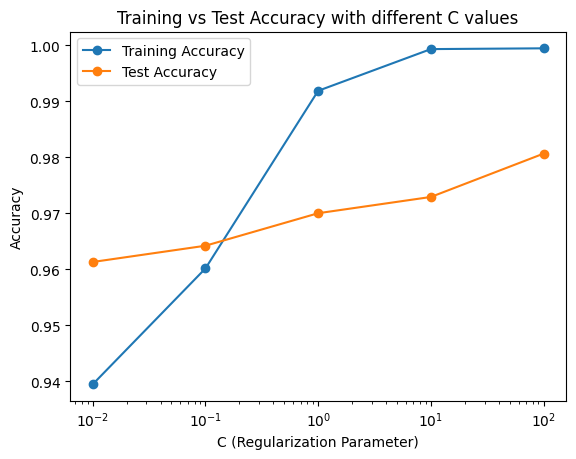

In [58]:
model = LogisticRegression(random_state=42)

train_accuracy = []
test_accuracy = []


for c in [0.01, 0.1, 1, 10, 100]:
    model.set_params(C=c)
    model.fit(X_train_resampled, y_train_resampled)


    train_accuracy.append(accuracy_score(y_train_resampled, model.predict(X_train_resampled)))
    test_accuracy.append(accuracy_score(y_test, model.predict(X_test)))


    print(f"Classification Report for C={c}:")
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


plt.plot([0.01, 0.1, 1, 10, 100], train_accuracy, label='Training Accuracy', marker='o')
plt.plot([0.01, 0.1, 1, 10, 100], test_accuracy, label='Test Accuracy', marker='o')
plt.xscale('log')
plt.xlabel('C (Regularization Parameter)')
plt.ylabel('Accuracy')
plt.title('Training vs Test Accuracy with different C values')
plt.legend()
plt.show()
